## REGRESIÓN LINEAL MÚLTIPLE

✅ RMSE: 12.940
✅ R² Score: 0.811
🔁 Validación cruzada R²: 0.806 ± 0.010


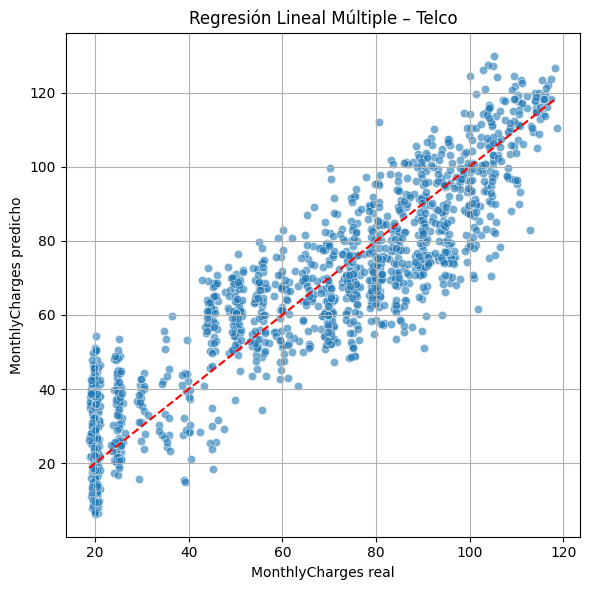

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("teleco_clean.csv")

y = df['MonthlyCharges']
X = df.drop(columns=['MonthlyCharges'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2')

print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ R² Score: {r2:.3f}")
print(f"🔁 Validación cruzada R²: {cv_r2.mean():.3f} ± {cv_r2.std():.3f}")

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("MonthlyCharges real")
plt.ylabel("MonthlyCharges predicho")
plt.title("Regresión Lineal Múltiple – Telco")
plt.grid(True)
plt.tight_layout()
plt.show()


## TRATAMIENTO

In [15]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Escalamos las variables numéricas
X_scaled = X.copy()
numeric_cols = ['tenure', 'TotalCharges']
scaler = StandardScaler()
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

# Combinamos X e y
df_clean = pd.concat([X_scaled, y], axis=1)

# Eliminamos outliers utilizando el rango intercuartílico (IQR)
for col in ['tenure', 'TotalCharges', 'MonthlyCharges']:
    Q1, Q3 = df_clean[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[col] >= Q1 - 1.5 * IQR) & (df_clean[col] <= Q3 + 1.5 * IQR)]

# Redefinimos X e y
X_clean = df_clean.drop(columns=['MonthlyCharges'])
y_clean = df_clean['MonthlyCharges']

# Evaluamos multicolinealidad (VIF)
X_vif = X_clean.copy()
vif_df = pd.DataFrame()
vif_df["Feature"] = X_vif.columns
vif_df["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\n📊 Multicolinealidad (VIF):")
print(vif_df.sort_values("VIF", ascending=False))



📊 Multicolinealidad (VIF):
             Feature       VIF
5       PhoneService  8.538764
4             tenure  5.924647
17      TotalCharges  4.953397
14          Contract  4.101447
7    InternetService  3.608358
16     PaymentMethod  3.354136
13   StreamingMovies  3.104411
12       StreamingTV  3.084649
2            Partner  2.771288
15  PaperlessBilling  2.645016
10  DeviceProtection  2.583802
6      MultipleLines  2.414363
11       TechSupport  2.393257
9       OnlineBackup  2.384164
8     OnlineSecurity  2.225631
3         Dependents  1.963509
0             gender  1.938458
18             Churn  1.756373
1      SeniorCitizen  1.344823


Métricas del modelo con la versión 'mejorada':
✅ RMSE: 16.435
✅ R² Score: 0.694
🔁 Validación cruzada R²: 0.692 ± 0.017


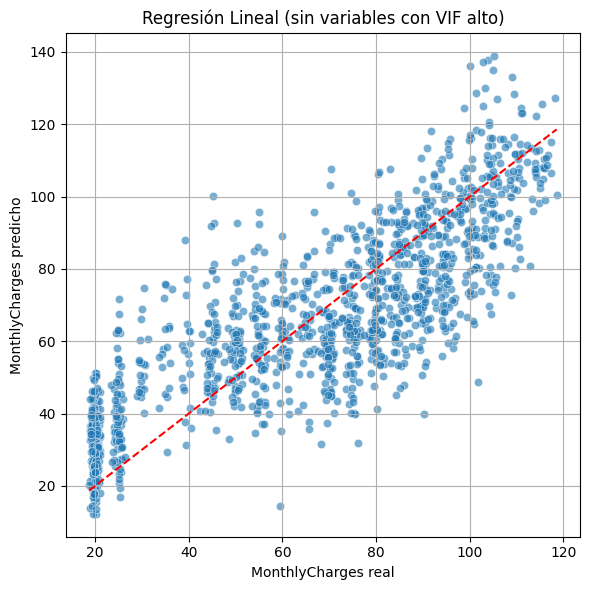

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Eliminamos variables con VIF alto (mayor a 5)
X_final = X_clean.drop(columns=['PhoneService', 'tenure'])
y_final = y_clean

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_r2 = cross_val_score(model, X_final, y_final, cv=5, scoring='r2')

print(f"Métricas del modelo con la versión 'mejorada':")
print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ R² Score: {r2:.3f}")
print(f"🔁 Validación cruzada R²: {cv_r2.mean():.3f} ± {cv_r2.std():.3f}")


# Gráfico
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("MonthlyCharges real")
plt.ylabel("MonthlyCharges predicho")
plt.title("Regresión Lineal (sin variables con VIF alto)")
plt.grid(True)
plt.tight_layout()
plt.show()


### Conclusión del Modelo Mejorado (Regresión Lineal sin multicolinealidad)

En esta segunda versión del modelo de regresión lineal, se aplicaron mejoras enfocadas en la robustez estadística:

- Se **escalaron las variables numéricas** (`tenure`, `TotalCharges`) para asegurar que todas operen en la misma escala.
- Se **eliminaron outliers** en variables clave usando el rango intercuartílico (IQR).
- Se eliminaron las variables con **alto VIF** (`PhoneService` y `tenure`) para reducir la multicolinealidad y mejorar la estabilidad del modelo.

Los resultados obtenidos fueron:

- ✅ **RMSE:** 16.435  
- ✅ **R² Score:** 0.694  
- 🔁 **Validación cruzada R²:** 0.692 ± 0.017

Aunque el rendimiento (R²) es algo inferior al del modelo original (≈ 0.81), esta versión ofrece mayor **interpretabilidad** y **consistencia estadística**, siendo menos vulnerable a redundancias o correlaciones internas entre predictores.

En contextos donde la **transparencia del modelo** y la **validez de los coeficientes** son prioritarias, esta versión representa una alternativa más sólida aunque menos precisa.



## REGRESIÓN CON XGBOOST REGRESSOR


### 🚀 ¿Qué aporta XGBoost Regressor?

**XGBoost** (Extreme Gradient Boosting) es una técnica de regresión mucho más avanzada basada en árboles de decisión. Estas son sus principales ventajas:

- ✅ **Captura relaciones no lineales** y complejas entre variables sin necesidad de transformarlas.
- ✅ Es robusto frente a **outliers** y **multicolinealidad**.
- ✅ Usa un enfoque de **boosting**, combinando muchos árboles débiles para formar un modelo fuerte.
- ✅ Optimiza el modelo mediante técnicas avanzadas como **regularización**, evitando el sobreajuste.

✅ RMSE: 1.076
✅ R² Score: 0.999
🔁 Validación cruzada R²: 0.998 ± 0.000


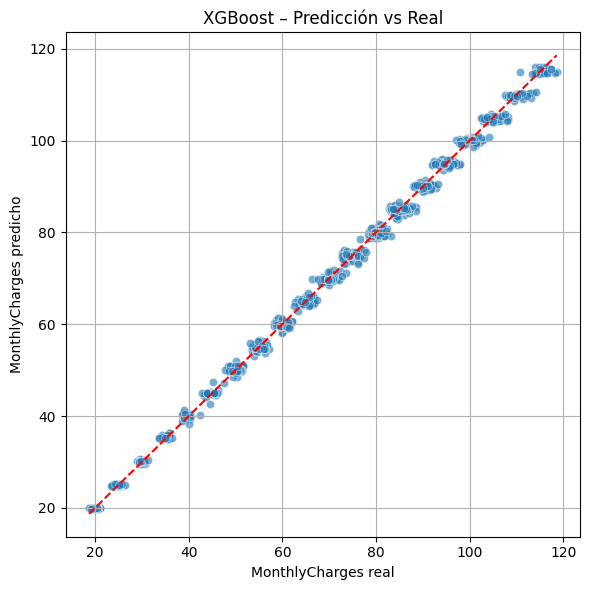

In [19]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

y = df['MonthlyCharges']
X = df.drop(columns=['MonthlyCharges'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
cv_r2 = cross_val_score(xgb_model, X_final, y_final, cv=5, scoring='r2')

print(f"✅ RMSE: {rmse:.3f}")
print(f"✅ R² Score: {r2:.3f}")
print(f"🔁 Validación cruzada R²: {cv_r2.mean():.3f} ± {cv_r2.std():.3f}")

# Visualización predicciones vs valores reales
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("MonthlyCharges real")
plt.ylabel("MonthlyCharges predicho")
plt.title("XGBoost – Predicción vs Real")
plt.grid(True)
plt.tight_layout()
plt.show()


## 📊 Comparativa de Modelos

| Modelo                     | RMSE   | R² Score | Validación cruzada R² (CV) |
|---------------------------|--------|----------|-----------------------------|
| Regresión Lineal Original | 12.940 | 0.811    | 0.806 ± 0.010               |
| Regresión Lineal Mejorada | 16.435 | 0.694    | 0.692 ± 0.017               |
| XGBoost Regressor         | 1.076  | 0.999    | 0.998 ± 0.000               |

### Conclusiones finales:
- El modelo **XGBoost** supera claramente en precisión y capacidad explicativa a los modelos lineales.
- La **regresión mejorada**, al eliminar multicolinealidad, redujo el riesgo de sesgos pero perdió capacidad predictiva.
- La **regresión lineal original** ofrece un equilibrio inicial aceptable, aunque está limitada en expresividad frente a XGBoost.
